# Customer Market Segmentation

## Problem Statement

Marketing is crucial for the growth and sustainability of business. Marketers help building the company's brand, engange customers, grow revenue, and increase sales. One of the key points for marketers is to know their customers and identify their needs. By understanding the customer, marketers can launch a targeted marketing campaign for specific group of customers and specific needs. They have to know their customers' spending habits, what do they like, and so on. By doing so, marketing team will be able to segment the market into different groups or categories.

NYC Bank has extensive data on htier customers for the past 6 months. The marketing team at the bank wants to launch a targeted marketing campaign by dividing their customers into at least 3 distinctive groups.

## Objectives

To develop a customer segmentation to define marketing strategy.

#### Data Dictionary for Credit Card Dataset :

1. CUSTID : Identification of Credit Card holder (Categorical)
2. BALANCE : Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES : Amount of purchases made from account
5. ONEOFFPURCHASES : Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES : Amount of purchase done in installment
7. CASHADVANCE : Cash in advance given by the user
8. PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently 10. purchased, 0 = not frequently purchased)
11. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
12. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
13. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
14. PURCHASESTRX : Numbe of purchase transactions made
15. CREDITLIMIT : Limit of Credit Card for user
16. PAYMENTS : Amount of Payment done by user
17. MINIMUM_PAYMENTS : Minimum amount of payments made by user
18. PRCFULLPAYMENT : Percent of full payment paid by user
19. TENURE : Tenure of credit card service for user

## Data

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('D:\Projects\Data Science\Marketing_data.csv')
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# check descriptive statistics
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Findings:
1. Top 25% customers have balance at least USD 2054 in their accounts
2. Mostly customers have been updating their balance frequently
3. Top 25% customers have minimum USD 1110 amount of purchases made from their account
4. Minimum value of maximum purchase amount done in one-go by Top 25% customers is USD 577


### Data Exploration

In [5]:
# check missing values
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# handling missing values

data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()
data.loc[(data['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].median()

In [7]:
# check duplicated entries
data.duplicated().sum()

0

In [8]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
len(data.columns)

18

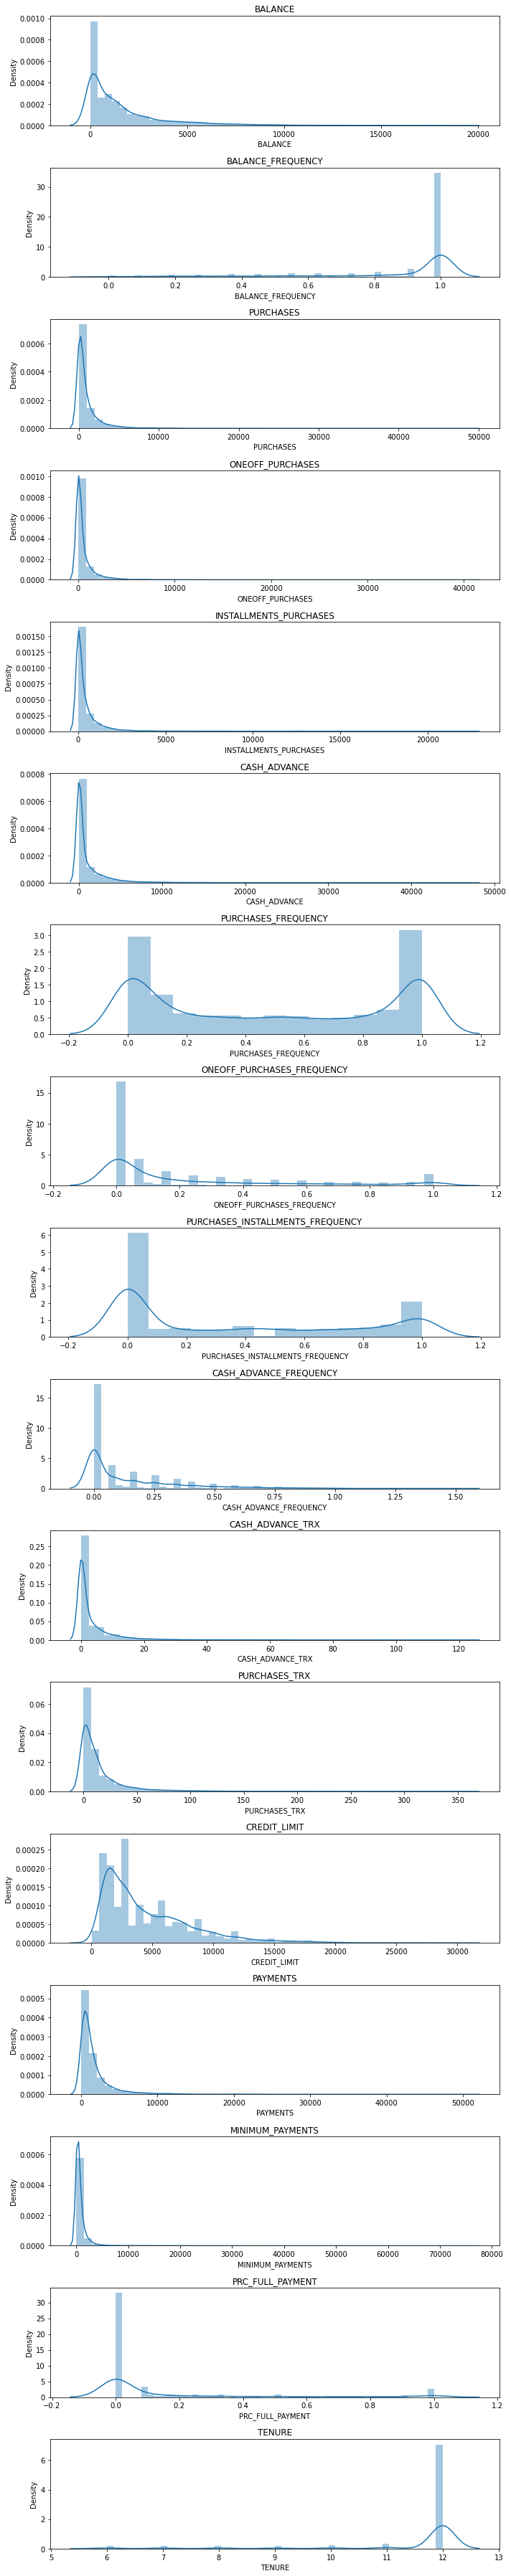

In [10]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,50))
for i in range(1,len(data.columns)):
    plt.subplot(17, 1, i)
    sns.distplot(data[data.columns[i]])
    plt.title(data.columns[i])

plt.tight_layout()
plt.show()

In [12]:
correlations = data.corr()

<AxesSubplot:>

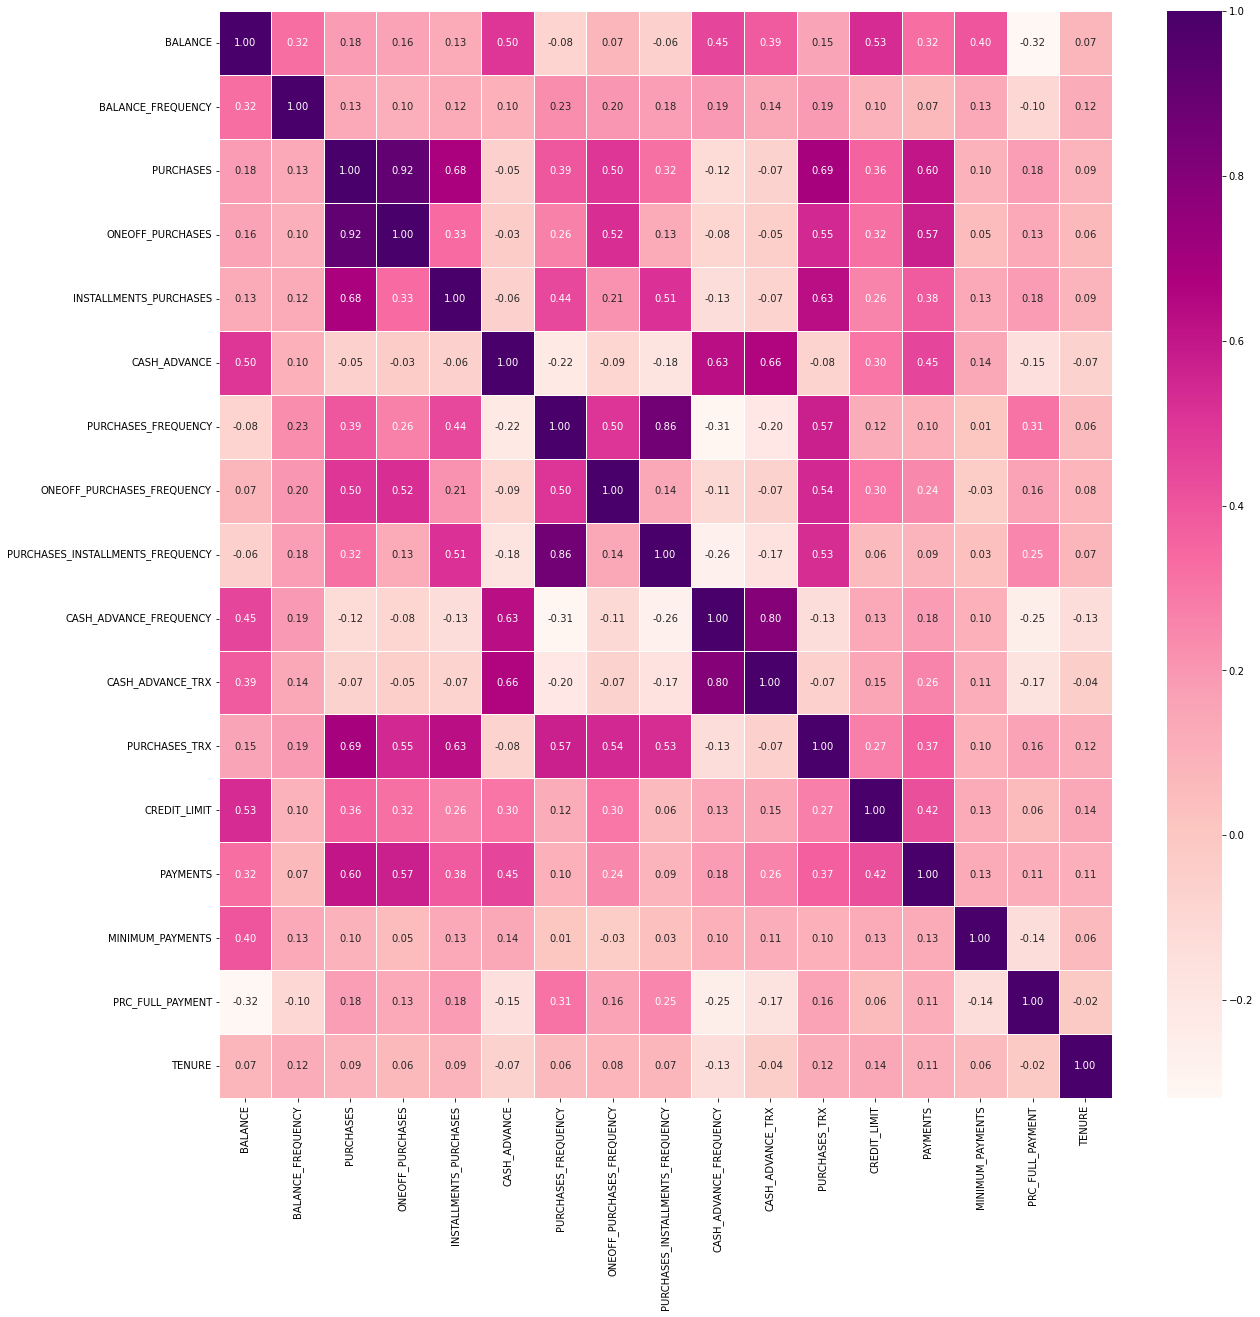

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True, linewidth=1, fmt='.2f', cmap='RdPu')

1. 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
2. Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


### Clustering

In [14]:
data.drop('CUST_ID', axis=1, inplace=True)

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

1 152150.0
2 127784.41768270913
3 111974.02071231528
4 99061.93984229013
5 91491.11253232486
6 84824.90236211705
7 79506.46581698317
8 74598.40503415797
9 71050.21051618448


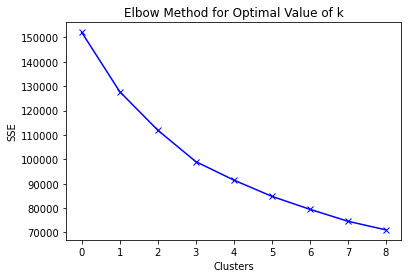

In [74]:
sse = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(data_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print(i, sse_)

plt.plot(sse, 'bx-')
plt.title('Elbow Method for Optimal Value of k')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

Let's choose 4 as the number of clusters, because SSE value does not reduce linearly untill 5th cluster.

In [55]:
# apply k to kmeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_

In [56]:
kmeans.cluster_centers_.shape

(4, 17)

In [57]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [data.columns])
cluster_centers  

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.321688,0.242574,0.109044,0.000926,0.255904,-0.366373,0.983721,0.317153,0.874138,-0.462599,-0.360303,0.296985,-0.077251,-0.138502,-0.087981,0.395041,0.057744
1,1.459571,0.384642,-0.234654,-0.164025,-0.253579,1.689346,-0.504596,-0.213017,-0.449811,1.747275,1.618647,-0.283389,0.838787,0.604825,0.496758,-0.406268,-0.097529
2,-0.265116,-0.368721,-0.343158,-0.230450,-0.387815,-0.182333,-0.797825,-0.389369,-0.714297,-0.101435,-0.164612,-0.474997,-0.334110,-0.262145,-0.124753,-0.258933,-0.052868
3,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429914,1.919096,0.483508,0.454703,0.324140


In [58]:
# concatenate the clusters labels to original dataframe (data)
data_cluster = pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
data_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


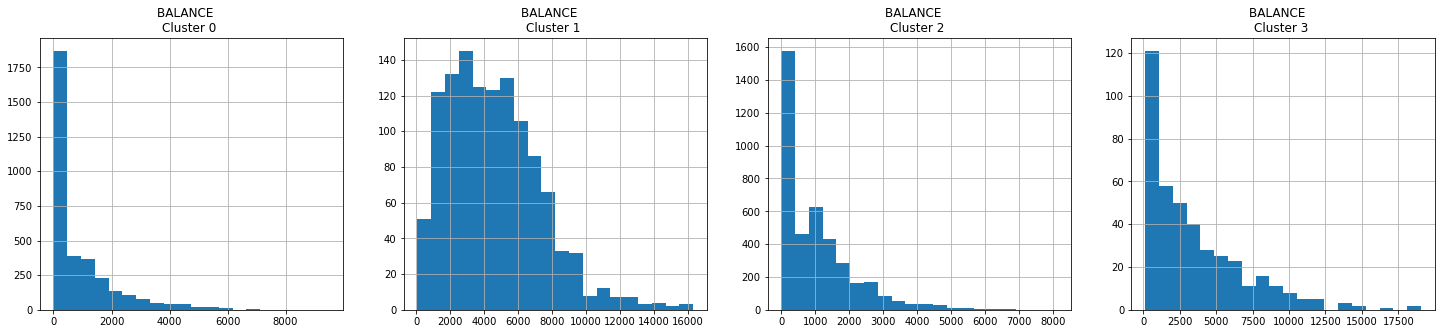

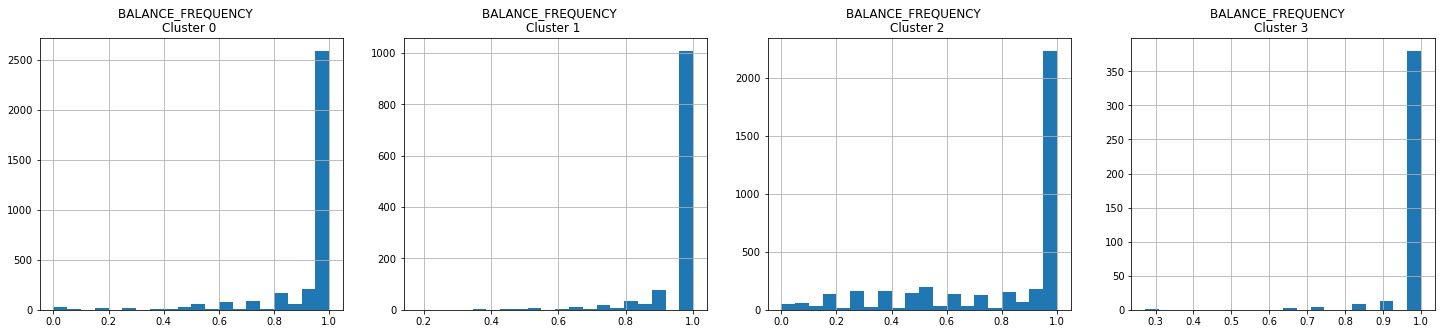

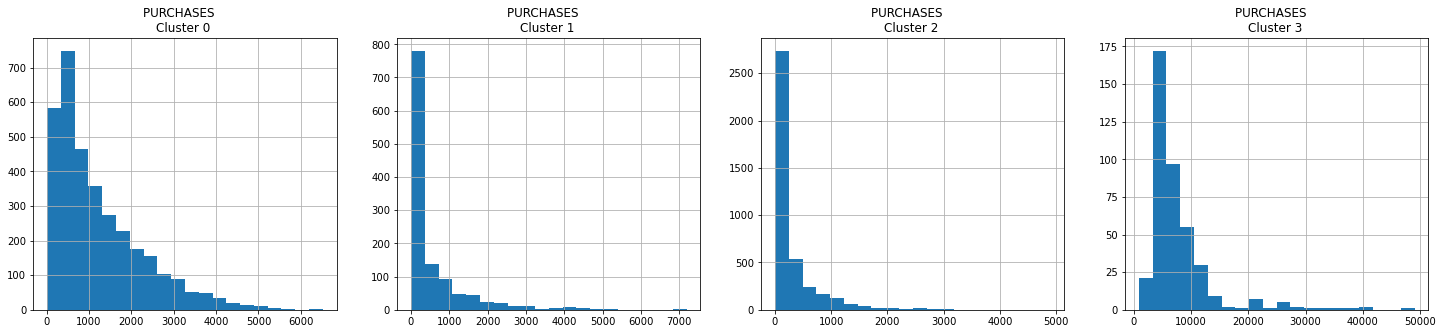

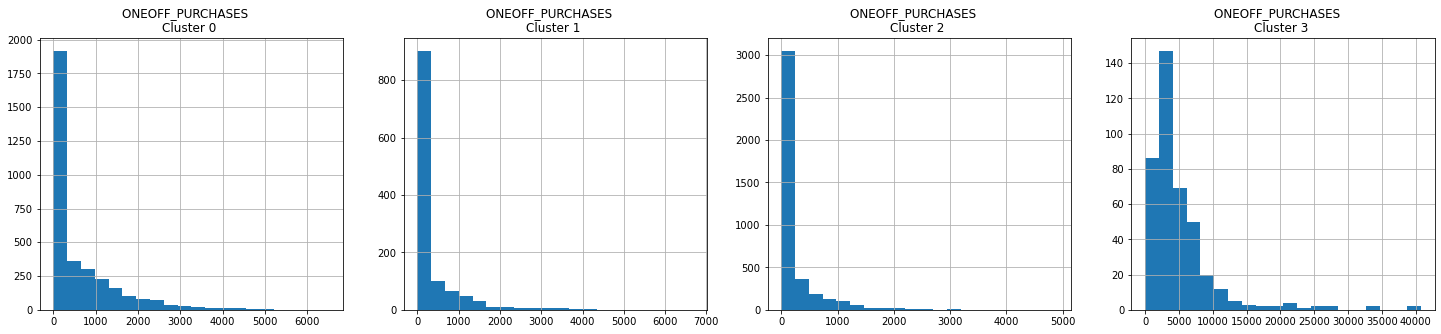

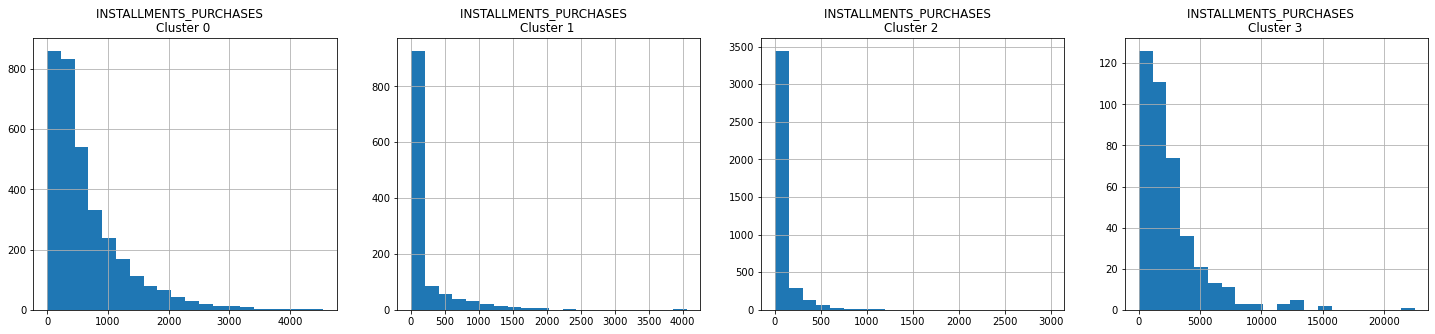

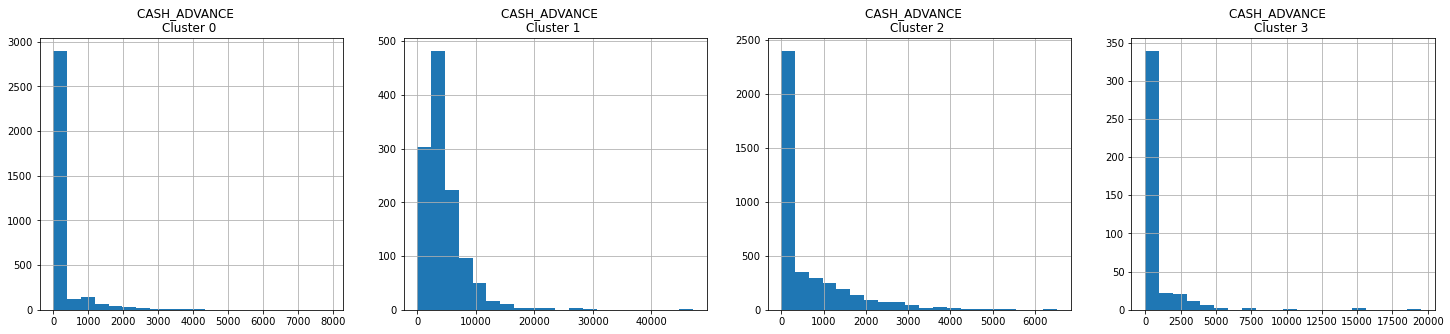

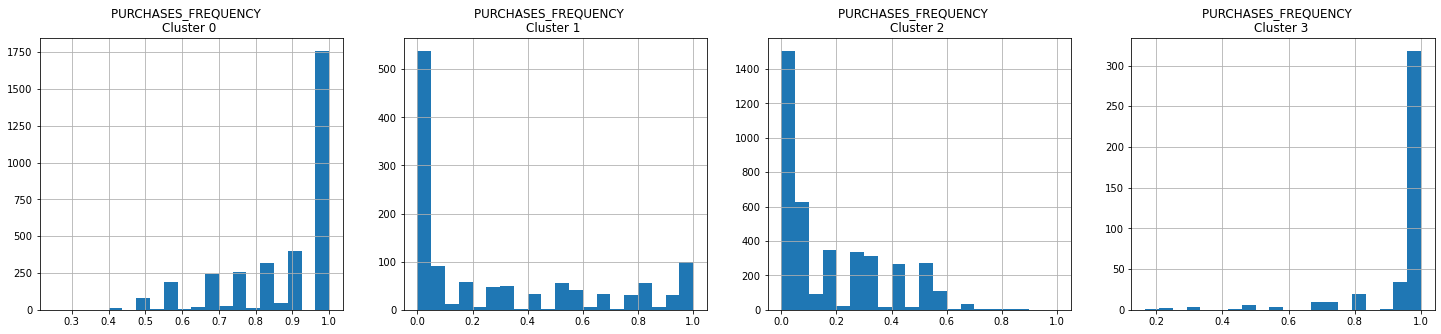

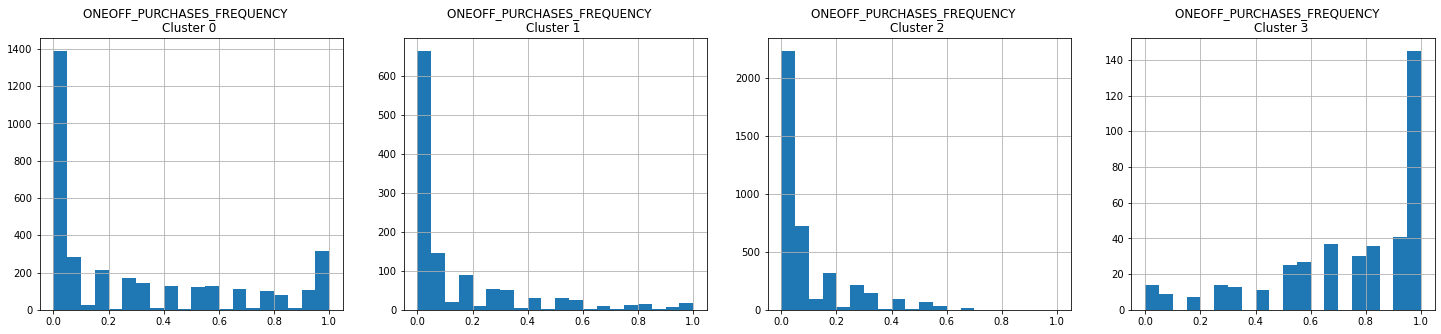

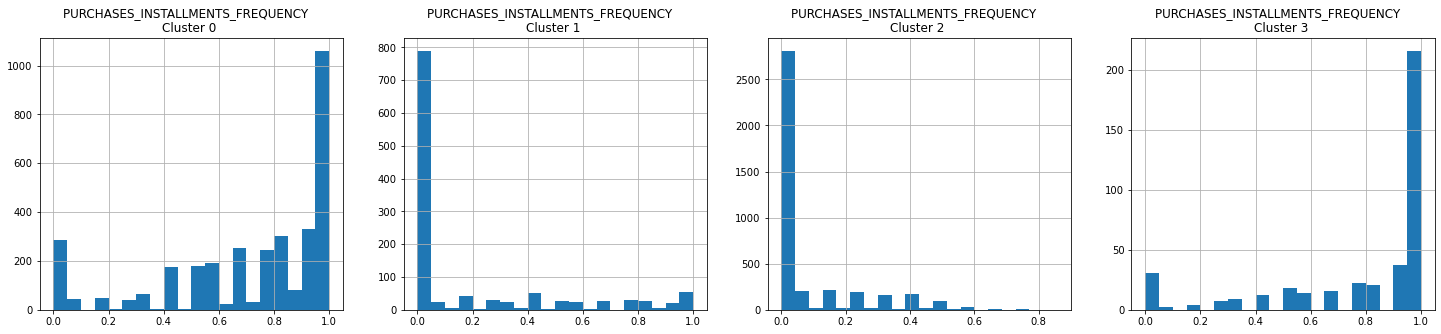

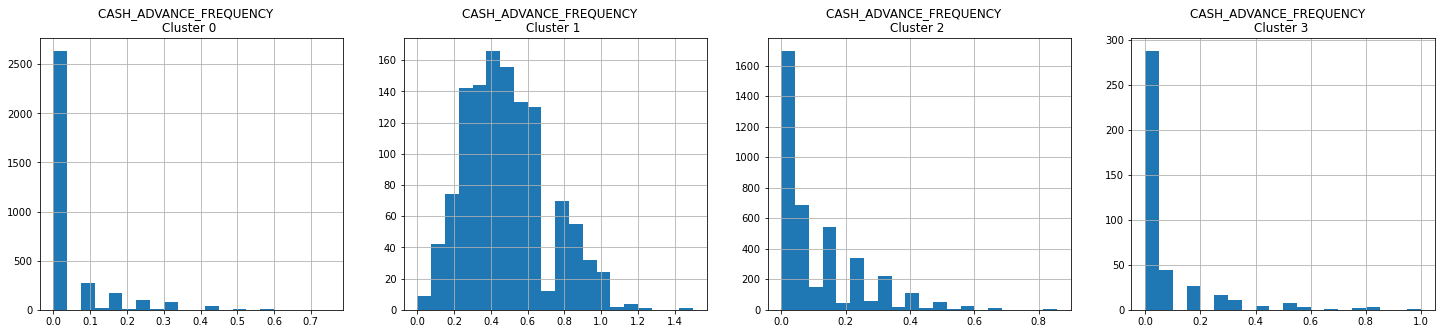

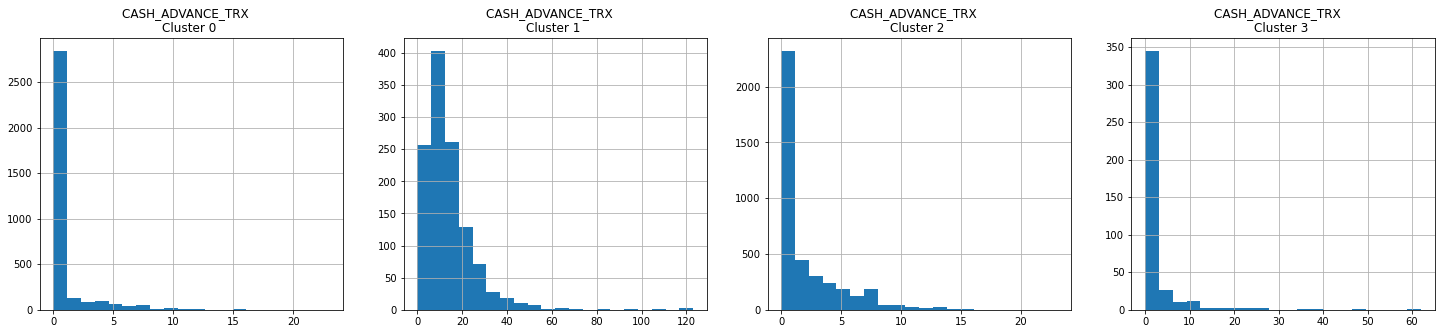

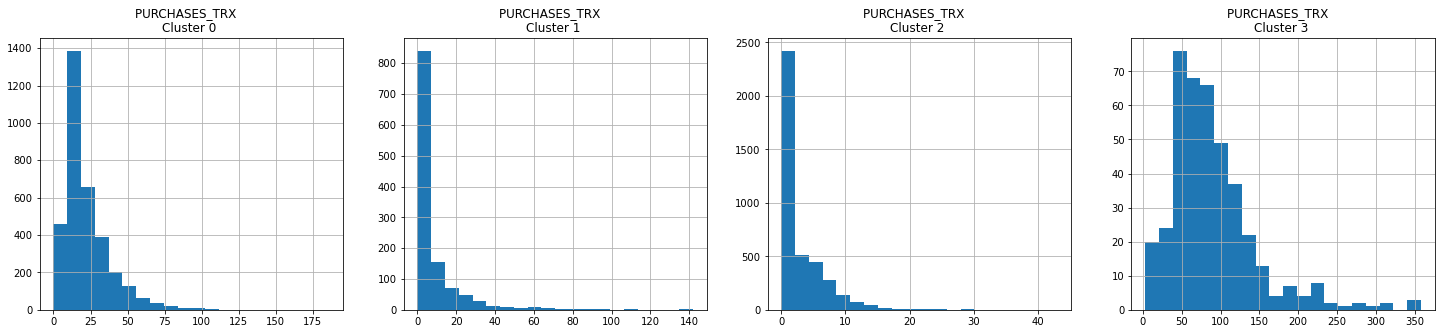

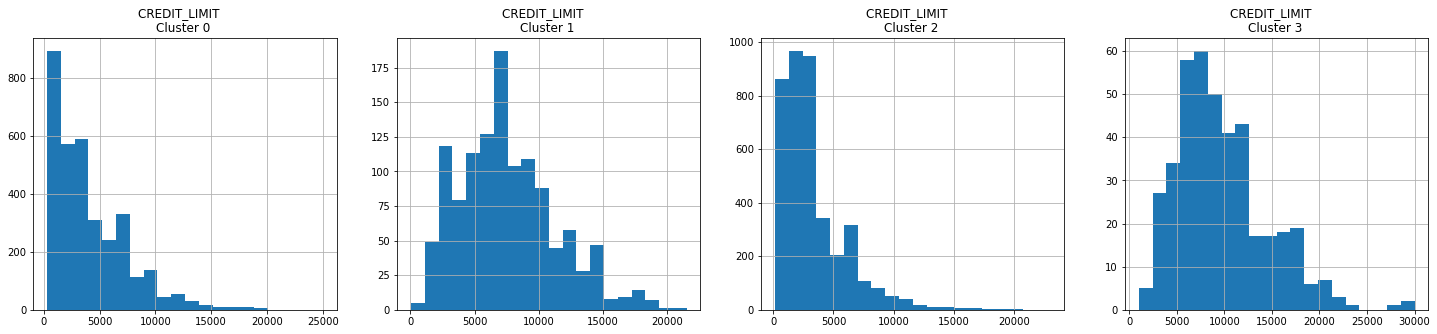

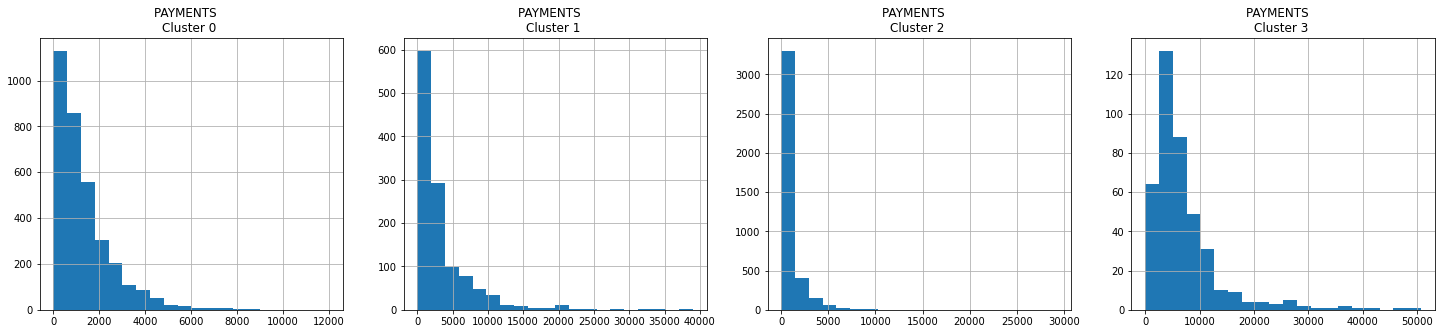

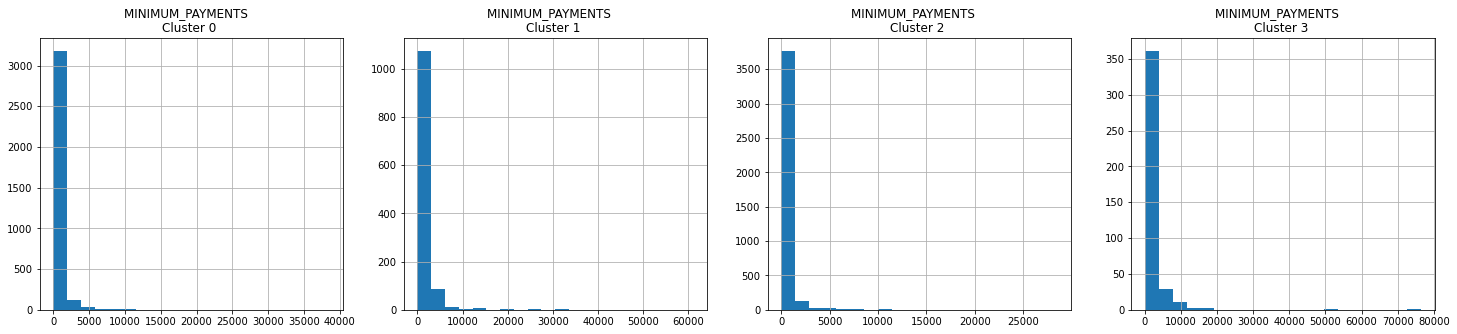

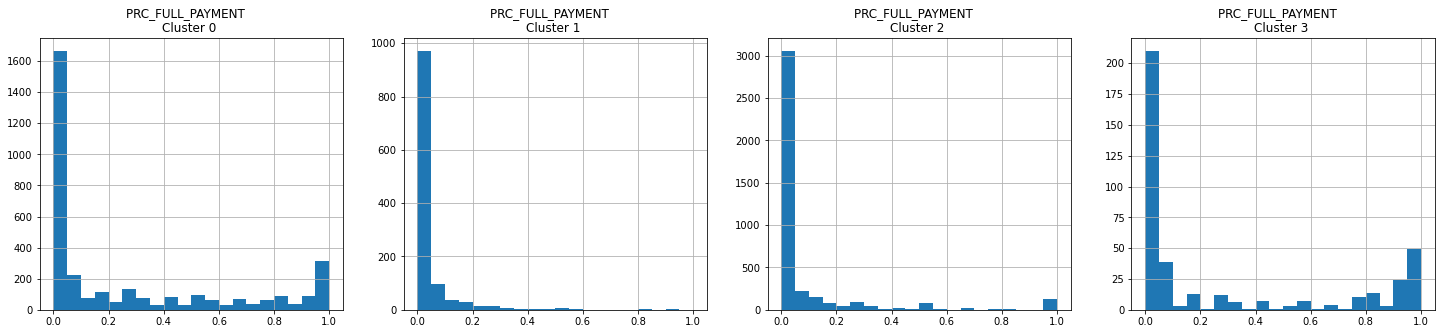

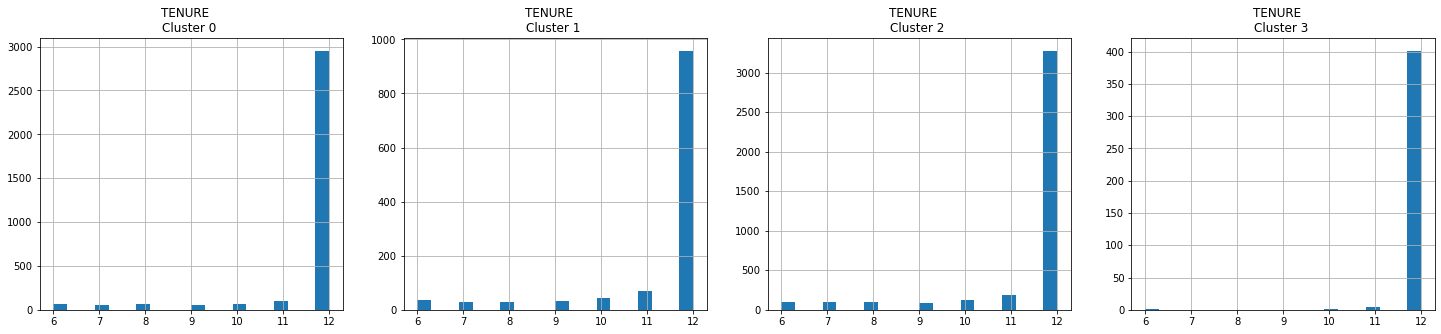

In [67]:
# plot histogram of clusters

for i in data.columns:
    plt.figure(figsize=(25,5))
    for j in range(4):
        plt.subplot(1,4,j+1)
        cluster = data_cluster[data_cluster['cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{}   \nCluster {} '.format(i,j))
    
    plt.show()

In [61]:
# apply principal component analysis to visualize the data in two-dimensional space
## obtain the principal components 

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(data_scaled)
principal_comp

array([[-1.68364905, -1.07224608],
       [-1.13408322,  2.50914893],
       [ 0.96939513, -0.38357318],
       ...,
       [-0.92898636, -1.80805479],
       [-2.33784583, -0.65361448],
       [-0.55802579, -0.40063361]])

In [62]:
# create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca_1','pca_2'])

# concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca_1,pca_2,cluster
0,-1.683649,-1.072246,2
1,-1.134083,2.509149,1
2,0.969395,-0.383573,0
3,-0.888220,0.004643,2
4,-1.600022,-0.683799,2


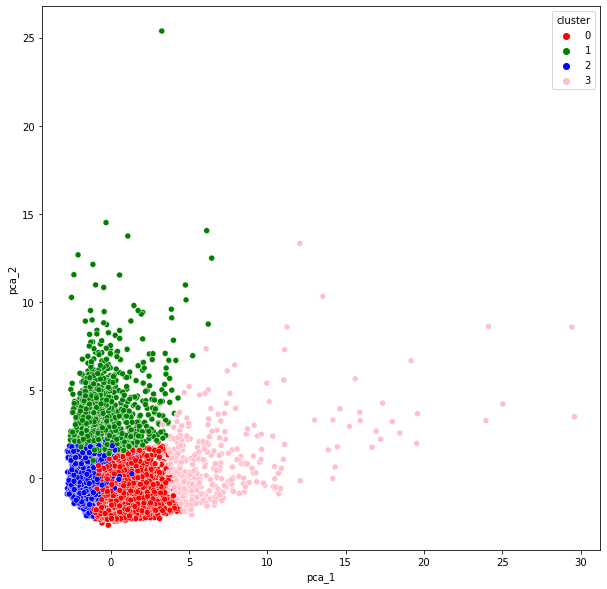

In [64]:
# visualize clusters in 2 principal components

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca_1", y="pca_2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink'])
plt.show()

In [71]:
# visualize clusters in 2 principal components

#plt.figure(figsize=(10,10))
#ax = sns.scatterplot(x="pca_1", y="pca_2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black','orange','navy'])
#plt.show()

#### Apply AutoEncoders to reduce dimensionality

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform

tf.random.set_seed(42)

input_df = Input(shape=(17,))


# Glorot normal initializer draws samples from a truncated normal distribution 

x = Dense(10, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [38]:
autoencoder.fit(data_scaled, data_scaled, batch_size = 128, epochs = 25)

Epoch 1/25
70/70 [==============================] - 2s 19ms/step - loss: 0.5121
Epoch 2/25
70/70 [==============================] - 1s 19ms/step - loss: 0.2592
Epoch 3/25
70/70 [==============================] - 1s 19ms/step - loss: 0.2027
Epoch 4/25
70/70 [==============================] - 1s 19ms/step - loss: 0.1711
Epoch 5/25
70/70 [==============================] - 1s 19ms/step - loss: 0.1391
Epoch 6/25
70/70 [==============================] - 1s 19ms/step - loss: 0.1276
Epoch 7/25
70/70 [==============================] - 1s 20ms/step - loss: 0.1177
Epoch 8/25
70/70 [==============================] - 1s 20ms/step - loss: 0.1123
Epoch 9/25
70/70 [==============================] - 1s 20ms/step - loss: 0.1032
Epoch 10/25
70/70 [==============================] - 1s 19ms/step - loss: 0.0943
Epoch 11/25
70/70 [==============================] - 1s 19ms/step - loss: 0.0879
Epoch 12/25
70/70 [==============================] - 1s 19ms/step - loss: 0.0866
Epoch 13/25
70/70 [==================

In [40]:
preds = encoder.predict(data_scaled)
preds.shape

280/280 [==============================] - 2s 6ms/step


(8950, 10)

1 118909.7890625
2 79940.28125
3 66901.4453125
4 58791.87890625
5 52094.828125
6 47997.98828125
7 44847.0390625
8 41687.62109375
9 38884.01953125


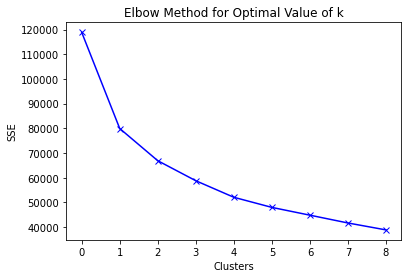

In [86]:
# apply kmeans clustering to reducted data 
## find k

sse2 = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(preds)
    sse_ = kmeans.inertia_
    sse2.append(sse_)
    print(i, sse_)

plt.plot(sse2, 'bx-')
plt.title('Elbow Method for Optimal Value of k')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

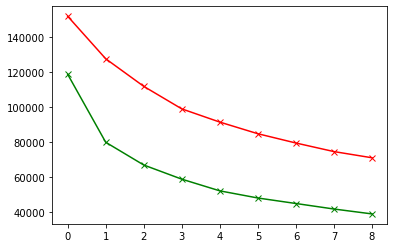

In [87]:
# compare elbow plot
plt.plot(sse, 'bx-', color = 'r')
plt.plot(sse2, 'bx-', color = 'g')

In [88]:
# apply k to kmeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(preds)
labels = kmeans.labels_

In [89]:
data_dimreducted_cluster = pd.concat([data, pd.DataFrame({'cluster':labels})], axis = 1)
data_dimreducted_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


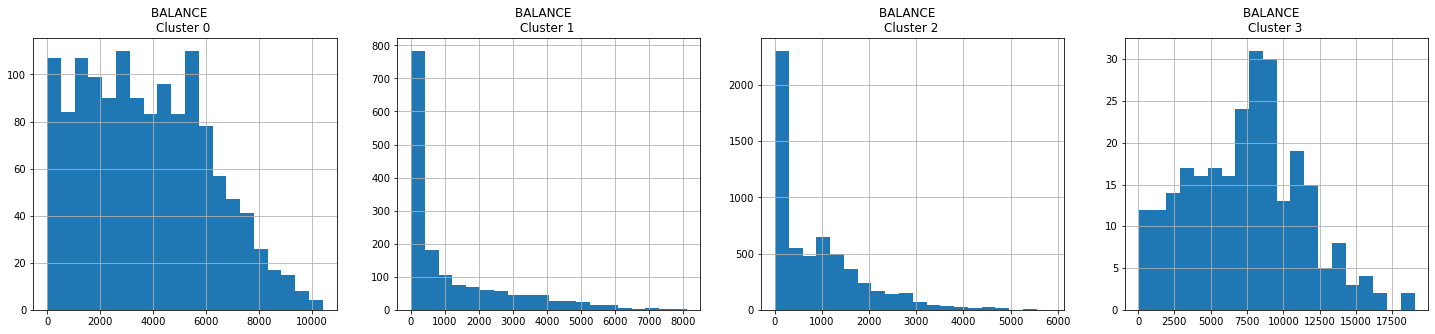

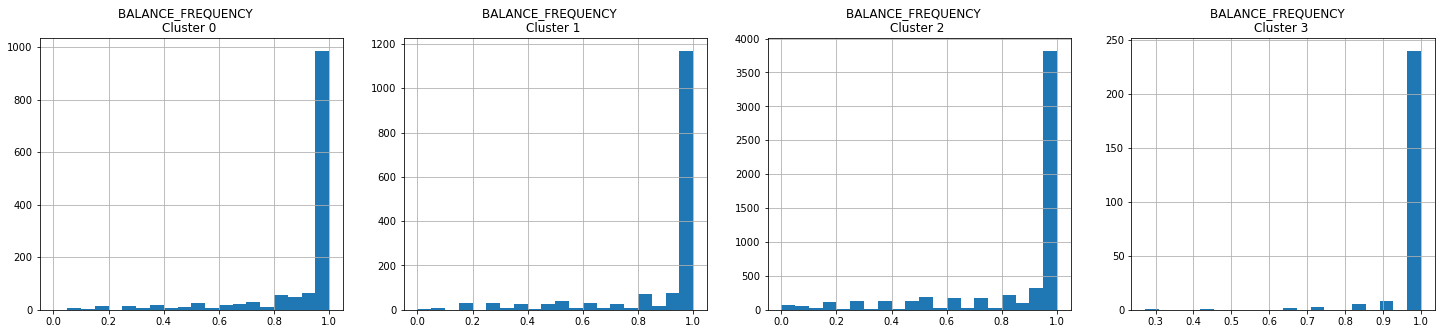

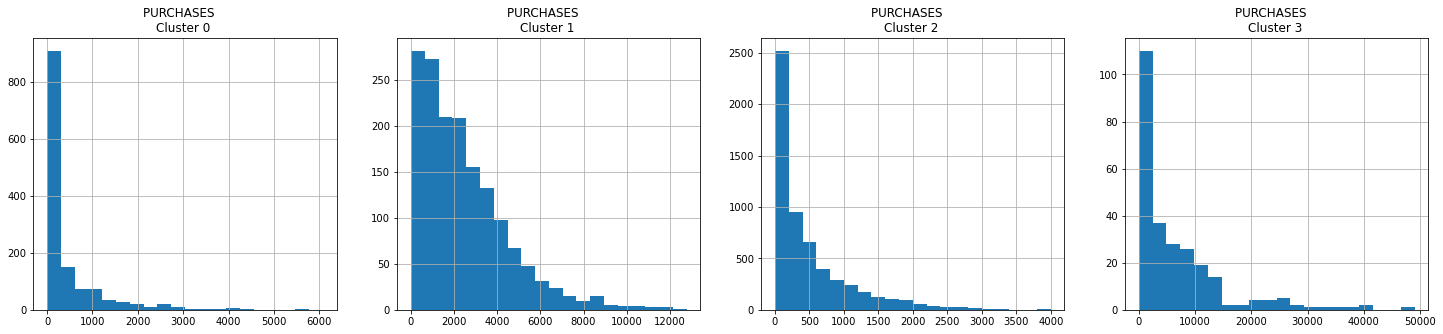

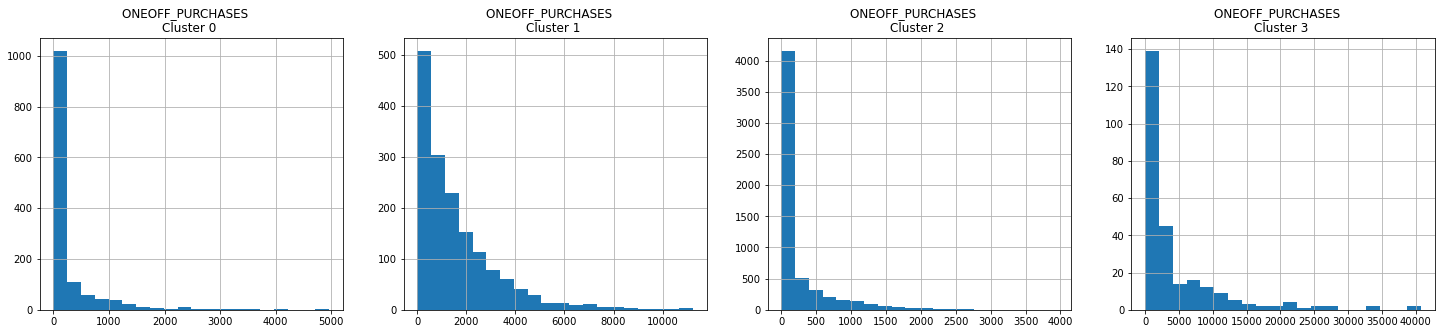

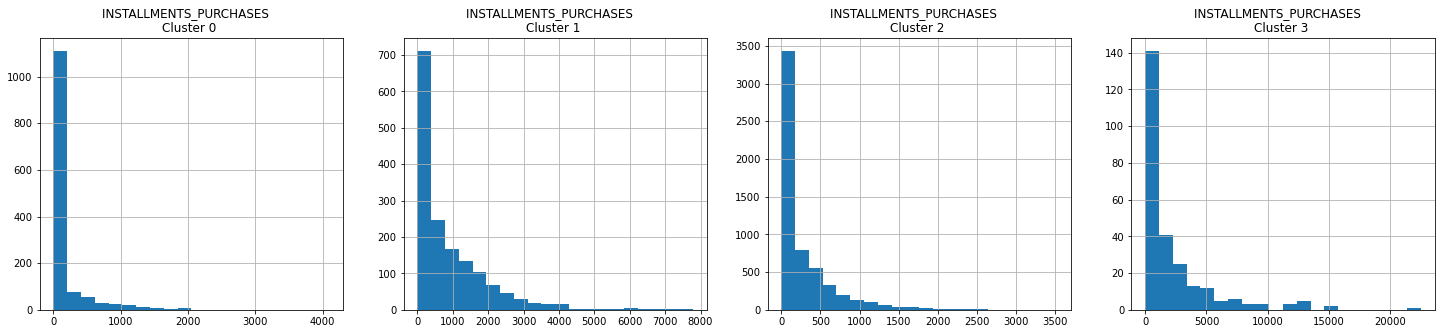

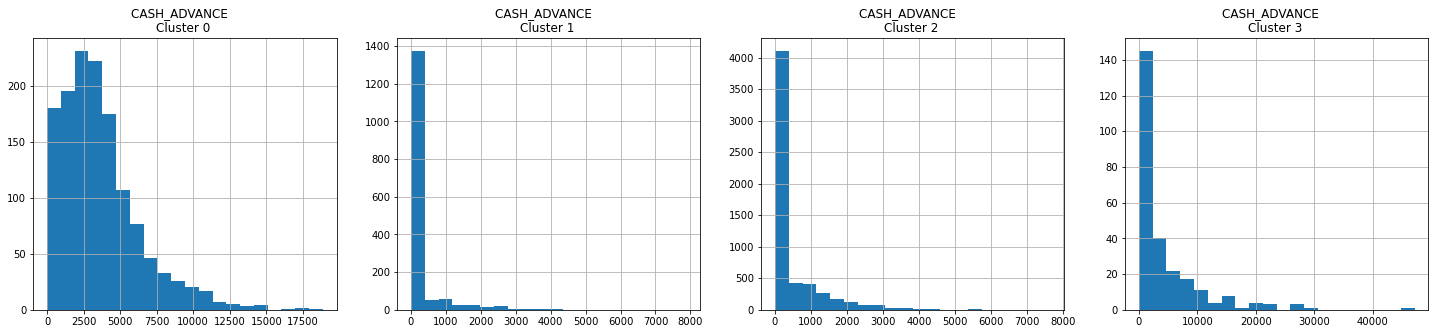

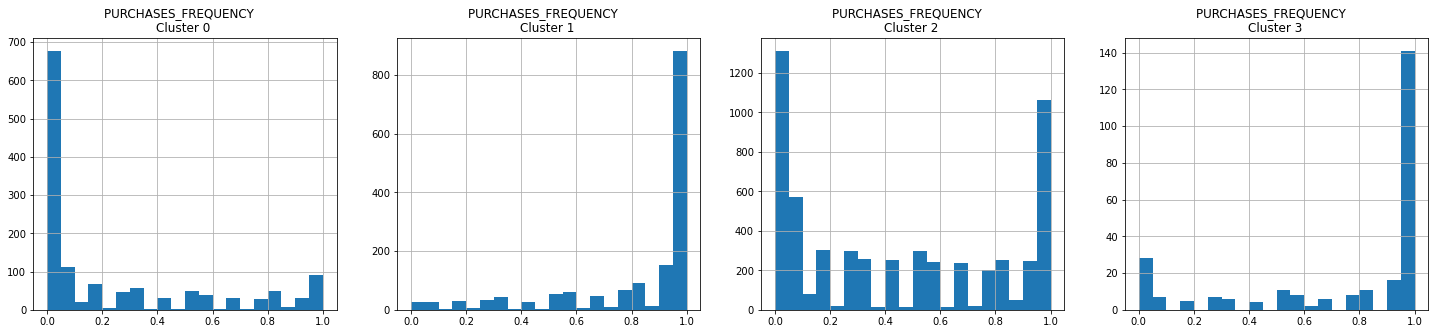

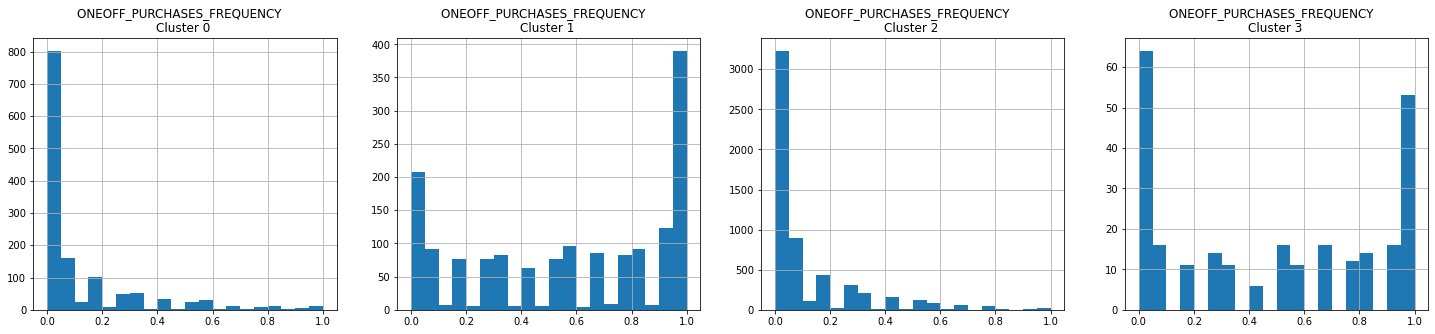

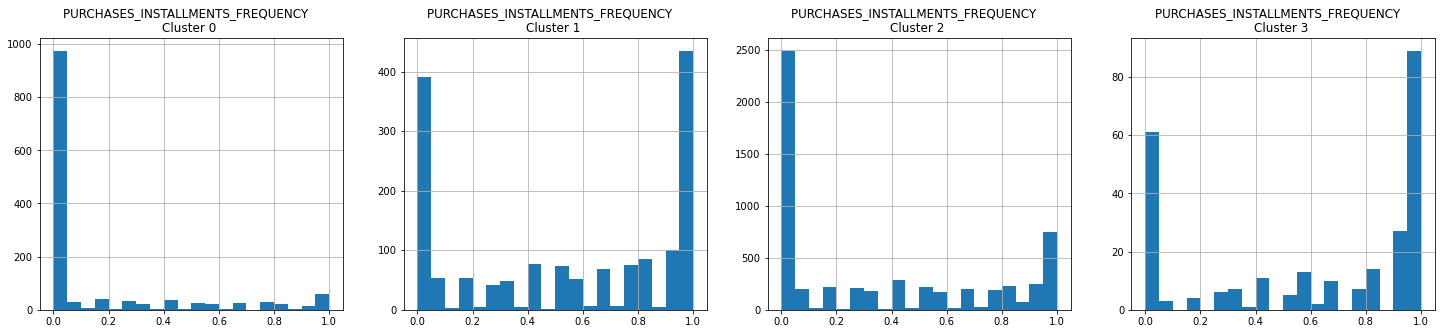

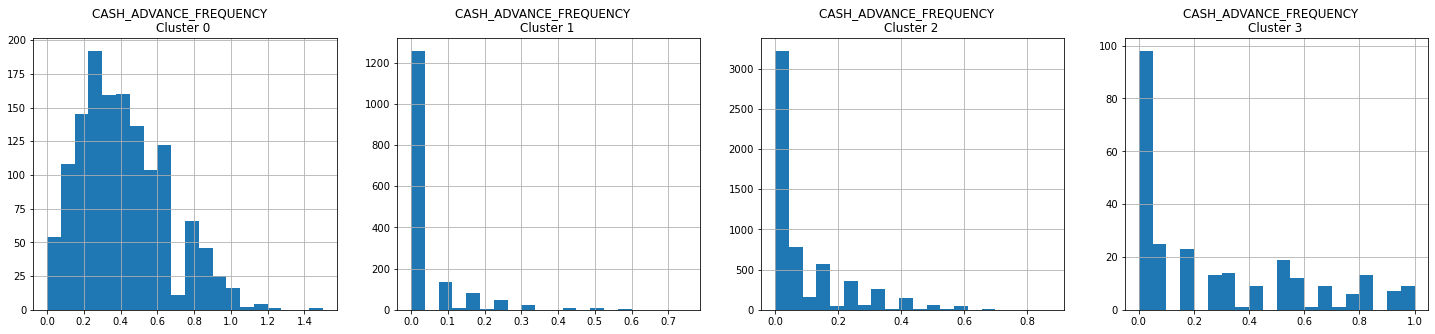

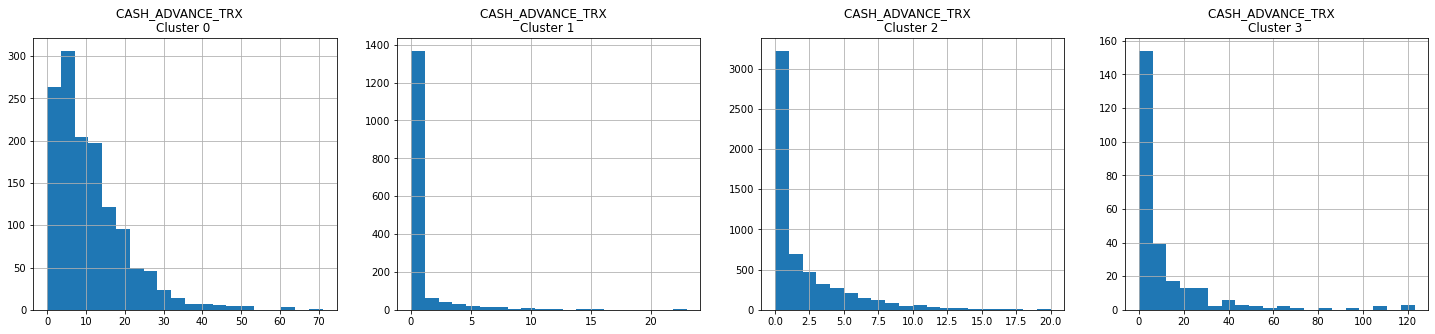

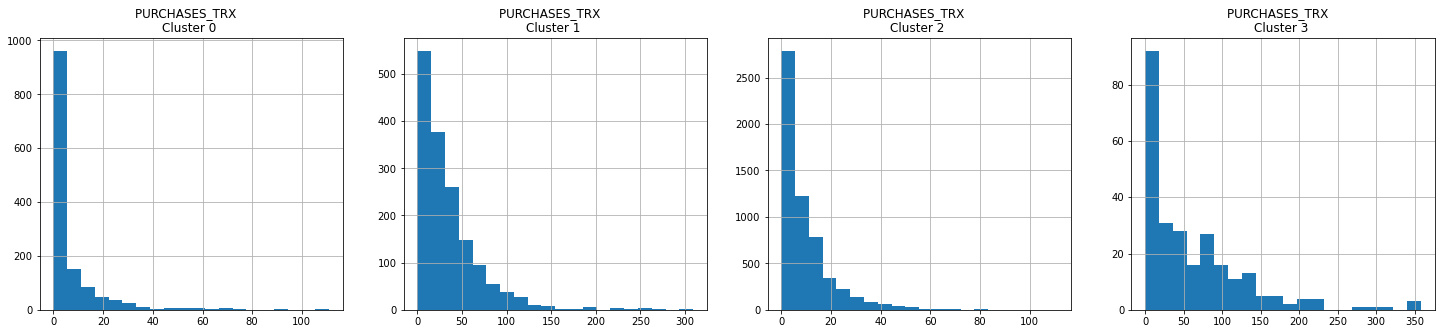

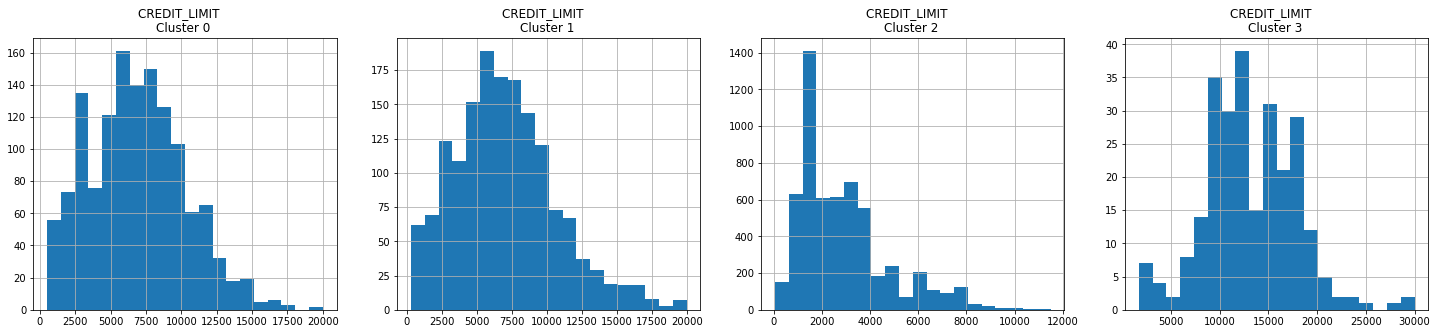

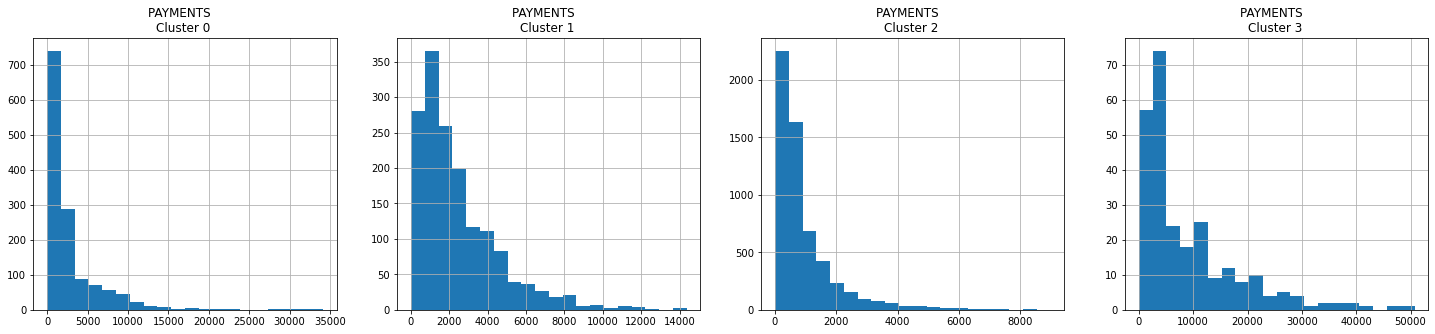

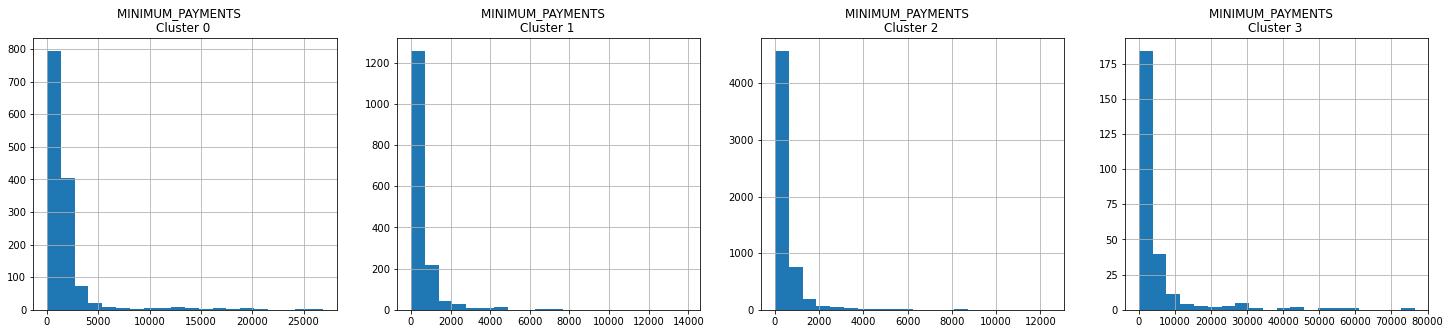

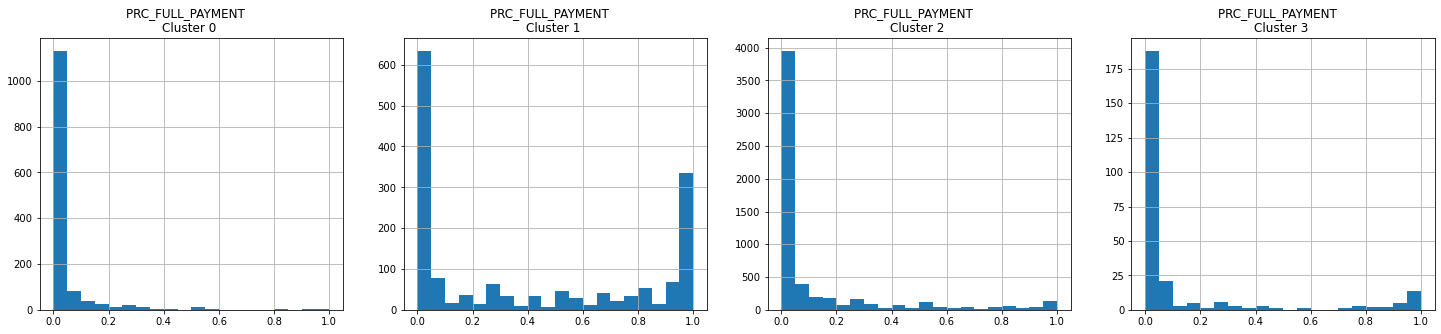

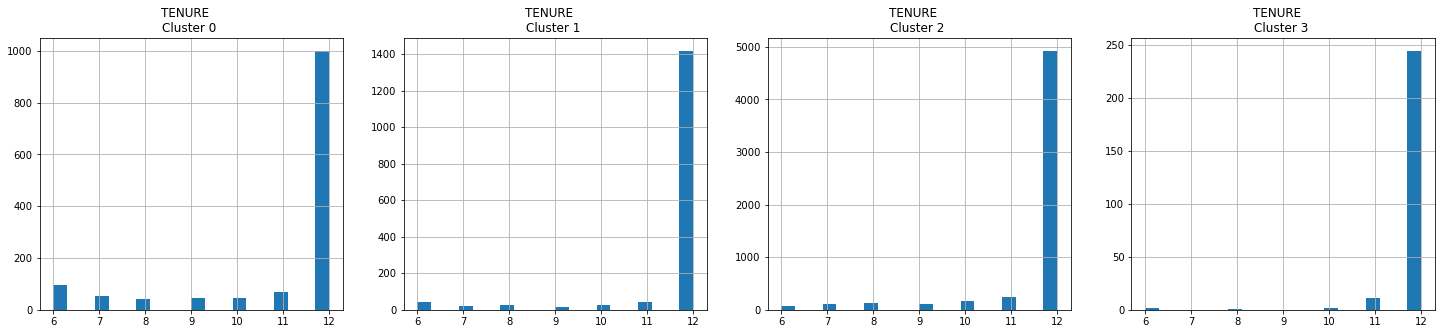

In [90]:
# plot histogram of clusters

for i in data.columns:
    plt.figure(figsize=(25,5))
    for j in range(4):
        plt.subplot(1,4,j+1)
        cluster = data_dimreducted_cluster[data_dimreducted_cluster['cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{}   \nCluster {} '.format(i,j))
    
    plt.show()

In [91]:
# apply principal component analysis to visualize the data in two-dimensional space
## obtain the principal components 

pca = PCA(n_components=2)
principal_comp_2 = pca.fit_transform(preds)

pca_df_2 = pd.DataFrame(data = principal_comp_2, columns =['pca1','pca2'])
pca_df_2 = pd.concat([pca_df_2,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df_2.head()

,pca1,pca2,cluster
0,-2.263742,0.034812,2
1,1.314597,1.897532,0
2,2.068968,-0.389775,1
3,0.935621,0.273684,0
4,-2.461591,0.118037,2


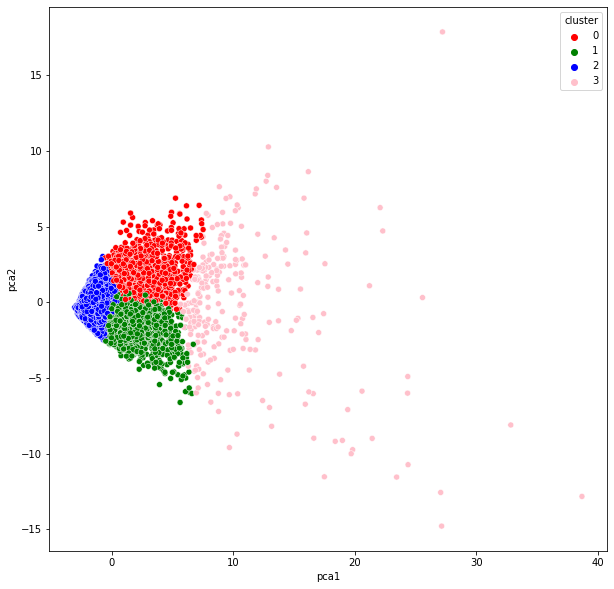

In [92]:
# visualize clusters in 2 principal components

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df_2, palette =['red','green','blue','pink'])
plt.show()